# D213 Sentiment Analysis Neural Networks
______________________________________________

## Nicole Reiswig

College of Information Technology, Western Governors University

Master of Science in Data Analytics

Dr. Festus Elleh

March 20, 2024

### Part I: Research Question
_______________________________

1. The research question we will be answering with this analysis is, "Can we determine a customer's sentiment utilizing sentiment analysis on this data set?"
2. The goal of this analysis is to utilize sentiment analysis to identify customer preferences to ensure we meet the customer's needs in a competitive business environment. 
3. The type of neural network that will be used is sequential text classification. This recurrent neural network is capable of performing text classification and can be trained to produce useful predictions and text sequences for the select dataset. 

### Part II: Data Preparation
__________________________________

##### Importing packages a libraries needed throughout the analysis

In [1]:
import numpy as np
import pandas as pd
import string
import re
from pandas import Series, DataFrame
import nltk
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import os
import datetime
import statistics
import tensorflow as tf
import keras
import tensorflow.keras 
from keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
import plotly.express as px
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from keras.callbacks import ModelCheckpoint, EarlyStopping

##### Setting the working directory

In [2]:
#set working directory
os.getcwd()

'C:\\Users\\ntrei'

##### Importing the three files and concatenating them to prepare for the analysis.

In [3]:
# Read the files
amazon = pd.read_csv("amazon_cells_labelled.txt", sep="\t", header=None, names=["text", "label"])
imdb = pd.read_csv("imdb_labelled.txt", sep="\t", header=None, names=["text", "label"])
yelp = pd.read_csv("yelp_labelled.txt", sep="\t", header=None, names=["text", "label"])

# Concatenate them
df = pd.concat((amazon, imdb, yelp), ignore_index=True)

# Print the first few rows of the concatenated dataframe
print(df.head())


                                                text  label
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  Tied to charger for conversations lasting more...      0
4                                  The mic is great.      1


Renaming columns for ease of reading and interpretting

##### Beginning the exploratory data analysis process by viewing the shape of the data we will be working with. This data set has 2748 rows and 2 columns.

In [4]:
df.shape

(2748, 2)

##### Preprocessing the data by changing the names of the columns for readability and ease of interpretation

In [5]:
#Rename Columns
df = df.rename(columns={'text': 'review_text', 'label': 'sentiment'})

##### Viewing the first five rows of the data to ensure successful change of column names

In [6]:
#Check dataframe for shape
print('Shape of data:', df.shape)
df.head()

Shape of data: (2748, 2)


,review_text,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


##### Checking for null and missing values in the dataset

In [7]:
#Checking for nulls
df.isnull()

,review_text,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2743,False,False
2744,False,False
2745,False,False
2746,False,False


##### There are no null or missing values in the data set 

In [8]:
#View nas
df.isna().any()

review_text    False
sentiment      False
dtype: bool

In [9]:
#Drop NAs
df=df.dropna()

Viewing the data types

##### Exploring the data further we have object and int64 data types, no null values

In [10]:
#Viewing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_text  2748 non-null   object
 1   sentiment    2748 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.1+ KB


##### Exploring the data further by viewing the mean, standard deviation, etc. 

In [11]:
#Describing data
df.describe()

,sentiment
count,2748.000000
mean,0.504367
std,0.500072
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


##### Changing capital letters to lowercase 

In [12]:
#Making lowercase
df['review_text'] = df['review_text'].str.lower()

##### There was a presence of special characters and unnecessary punctuation so this was removed from the review text

In [13]:
#Remove punctuation
df.review_text = df.review_text.str.replace(r'[^\w\s]+', '')
df.review_text = df.review_text.str.replace(r'\(.*\)', '', regex = True)
df.review_text = df.review_text.str.strip()

In [14]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
 "*","+",",","-",".","/",":",";","<",
 "=",">","?","@","[","\\","]","^","_",
 "`","{","|","}","~","–"]

In [15]:
# Defining special characters
spec_chars = ['!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '?', '.']


In [16]:
# Replacing special characters with spaces
for char in spec_chars:
    df['review_text'] = df['review_text'].str.replace(re.escape(char), '')

##### Viewing the length of text to ensure data shape has not been altered with changes made to the data

In [17]:
df.shape

(2748, 2)

##### Adding a column with the length of the review

In [18]:
#Length of text
df['review_length'] = df.review_text.str.len()

In [19]:
#Preview data
df.head()

,review_text,sentiment,review_length
0,so there is no way for me to plug it in here i...,0,82
1,"good case, excellent value.",1,27
2,great for the jawbone.,1,22
3,tied to charger for conversations lasting more...,0,77
4,the mic is great.,1,17


##### Viewing the distribution of positive and negative reviews

<Axes: xlabel='sentiment', ylabel='count'>

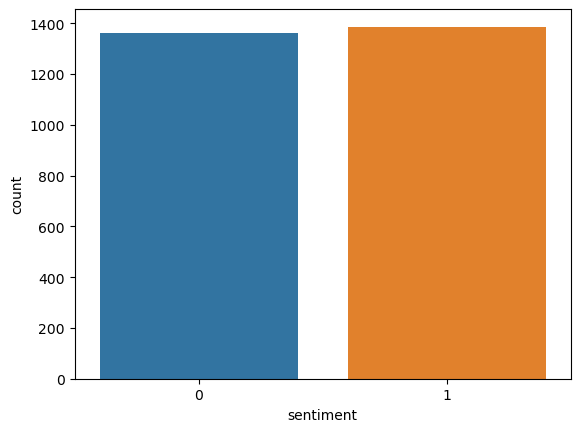

In [20]:
#Observe distribution
sns.countplot(x='sentiment', data=df)

##### There are two categories of sentiment 1 and 0 for positive and negative. 

##### The number of positive reviews is 1386 and number of negative reviews is 1362 within the data set

In [21]:
#Count of positive and negative reviews
df.sentiment.value_counts()

sentiment
1    1386
0    1362
Name: count, dtype: int64

##### The percent of positive reviews is 50% and the percent of negative reviews is 49% within the data set

In [22]:
#Percent of positive and negative reviews
df.sentiment.value_counts() / len(df)

sentiment
1    0.504367
0    0.495633
Name: count, dtype: float64

##### Viewing the max length of review at 7826 and min length of review at 0 

In [23]:
#Length of longest review 
length_reviews = df.review_text.str.len()

In [24]:
type(length_reviews)

pandas.core.series.Series

##### The mean length of review is 69.73

In [25]:
statistics.mean(length_reviews)

69.72816593886463

In [26]:
max(length_reviews)

7826

In [27]:
min(length_reviews)

0

In [28]:
length_reviews.shape

(2748,)

In [29]:
df.head()

,review_text,sentiment,review_length
0,so there is no way for me to plug it in here i...,0,82
1,"good case, excellent value.",1,27
2,great for the jawbone.,1,22
3,tied to charger for conversations lasting more...,0,77
4,the mic is great.,1,17


##### The cleaned dataset is exported

In [30]:
# export file to csv
df.to_csv('cleaned_data2132.csv', index = False)

##### Stemming and lemmatizing are performed which identifies the root words

In [31]:
demoWords = ["making","going","go","do","does","doing","yes","no","having","had","jumping","coding","programming","code"]

In [32]:
# Left column is original center is stemmer right column is lemmatizer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
for word in demoWords:
    print(word, stemmer.stem(word), lemmatizer.lemmatize(word,"v"))

making make make
going go go
go go go
do do do
does doe do
doing do do
yes ye yes
no no no
having have have
had had have
jumping jump jump
coding code cod
programming program program
code code code


##### Finding the vocabulary and word embedding length

In [33]:
reviews = df['review_text'].tolist()
vocab = []
max_review_len = 70

for review in reviews:
    review_len = len(review.split(" "))
    if review_len > max_review_len:
        max_review_len = review_len

for word in review.split(" "):
    if not word in vocab:
        vocab.append(word)

print("Vocab:  ", len(vocab))
print("Longest:  ", max_review_len)
print("Emb Size:  ", len(vocab)**0.25)

Vocab:   26
Longest:   1376
Emb Size:   2.2581008643532257


##### The longest sentence uses 1376 words. There are 26 distinct words in the vocabulary. The proposed word embedded length is 2.258.

##### Tokenizing is breaking the sentence into individual words, padding occurs after text sequencing 

##### The goal of tokenization is to break a sentence into individual words. For tokenizing this data set the number of words was set at 8000 because that is more than the longest review. The vocab size was set at 64 because that is what is recommended and is greater than the vocab at 26. The max length was set at 52 as that is what is recommended. 

In [34]:
review_text = df.review_text.values
tokenizer = Tokenizer(num_words=8000)
tokenizer.fit_on_texts(review_text)
vocab_size = 64
encoded_docs = tokenizer.texts_to_sequences(review_text)
padded_sequence = pad_sequences(encoded_docs, maxlen=52, padding='post')

In [35]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'a': 4, 'is': 5, 'it': 6, 'to': 7, 'this': 8, 'of': 9, 'was': 10, 'in': 11, 'for': 12, 'not': 13, 'that': 14, 'with': 15, 'my': 16, 'very': 17, 'good': 18, 'on': 19, 'great': 20, 'you': 21, 'but': 22, 'movie': 23, 'are': 24, 'have': 25, 'as': 26, 'so': 27, 'phone': 28, 'film': 29, 'be': 30, 'all': 31, 'one': 32, '0': 33, 'had': 34, '1': 35, 'at': 36, 'food': 37, 'like': 38, 'just': 39, 'place': 40, 'time': 41, "it's": 42, 'service': 43, 'if': 44, 'were': 45, 'really': 46, 'an': 47, 'bad': 48, 'there': 49, 'from': 50, 'they': 51, 'we': 52, 'well': 53, 'out': 54, 'has': 55, 'would': 56, 'about': 57, 'no': 58, 'your': 59, 'or': 60, 'best': 61, 'only': 62, 'by': 63, 'even': 64, "don't": 65, 'here': 66, 'ever': 67, 'up': 68, 'also': 69, 'back': 70, 'will': 71, 'when': 72, 'me': 73, 'than': 74, 'more': 75, 'quality': 76, 'go': 77, 'what': 78, 'love': 79, 'he': 80, "i've": 81, 'made': 82, 'can': 83, 'because': 84, 'product': 85, 'which': 86, 'get': 87, 'how': 88, 

##### The goal of vectorizing is to convert words to numbers

In [36]:
encoded_reviews = [keras.preprocessing.text.one_hot(d, len(vocab)) for d in reviews]
print(encoded_reviews[0])

[13, 15, 20, 18, 3, 13, 9, 21, 4, 11, 21, 21, 21, 24, 7, 20, 23, 4, 4, 20, 23]


In [37]:
print(review_text[0])
print(encoded_docs[0])

so there is no way for me to plug it in here in the us unless i go by a converter.
[27, 49, 5, 58, 118, 12, 73, 7, 367, 6, 11, 66, 11, 1, 186, 642, 3, 77, 63, 4, 2241]


##### The goal of padding is to make all sentences the same length and this is required by tensor flow to perform the chosen analysis. This padding was performed post. 

In [38]:
padded_reviews = keras.preprocessing.sequence.pad_sequences(encoded_reviews, maxlen=max_review_len, padding='post')
print(padded_reviews)

[[13 15 20 ...  0  0  0]
 [ 8  2 21 ...  0  0  0]
 [ 4 13 24 ...  0  0  0]
 ...
 [ 8 23  5 ...  0  0  0]
 [24 16  2 ...  0  0  0]
 [16 20 20 ...  0  0  0]]


In [39]:
print(padded_reviews[0])

[13 15 20 ...  0  0  0]


##### There are two categories of sentiment. 

##### Steps used to prepare the data set are to set the working directory, import the data sets, concat the data, check for missing or null values, view the shape of the data, remove any nulls, impute capital letters with lowercase, remove any special characters or punctuation, use stemming or lemmatization, tokenize, vectorize, add padding, split the data set and save the data set. 

In [40]:
#Split the dataset
x_train, x_test, y_train, y_test = train_test_split(padded_reviews, df.sentiment, test_size=0.2, random_state=7)

In [41]:
#Save the dataset

In [42]:
df_final = pd.DataFrame(padded_reviews)
df_final['sentiment'] = df.sentiment
df_final.to_csv('sentiment_prepared.csv')

##### A copy of the prepared data set are in included in the submission. 

### Part III: Network Architecture

##### See the below model summary

In [43]:
#Build, compile, summary(), fit the model

In [44]:
embedding_dim = 6

In [45]:
activation = 'softmax'
loss = 'sparse_categorical_crossentropy'
optimizer = 'adam'
num_epochs = 20

early_stopping_monitor = EarlyStopping(patience=2)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(vocab), 70, input_length=max_review_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(2, activation=activation)
])

model.compile(loss=loss,optimizer=optimizer,metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train, batch_size=32, epochs=num_epochs,
                    validation_split = 0.3, callbacks=[early_stopping_monitor], verbose=True)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1376, 70)          1820      
                                                                 
 global_average_pooling1d (  (None, 70)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 100)               7100      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 14072 (54.97 KB)
Trainable params: 14072 (54.97 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

##### We've employed five layers in our sequential model. The first layer is the embedding layer with 1820 parameters with an embedding length of 70 which is the mean length review. The second layer is the global average pooling which changes the model to 2D. The third layer has a density of 100 (or 100 nodes) with relu activation. The fourth layer has a density of 50 (or 50 nodes) with relu activation. The fifth layer has a density of 2 (or 2 nodes) with relu activation. Relu is rectified linear activation and is used for hidden layers and can be used if there are 2 or more sentiments. The activation function employed was softmax, the optimizer used was adam, the loss function was sparse categorical cross-entropy, the epoch was set at 20 and an early stop monitor was used to prevent overfitting. These functions work well with our dataset being binary classification 0/1. The model stopped running at 7 epochs which indicates 7 epochs may be optimal for the entered parameters. The val accuracy is .5045 which means the model predicated the correct sentiment 50% of the time. The evaluation metrics being used are accuracy and loss. 

### Part IV: Model Evaluation

##### The stopping criteria were utilized to prevent overfitting. The stopping criteria works by stopping once it reaches the optimal number of epochs. There does not appear to be overfitting as the accuracy score is not optimal. The model needs to be refined to produce higher accuracy predictions. 

In [46]:
#Generate the history graphs showing model accuracy and loss

In [47]:
res = model.evaluate(x_test, y_test, verbose = 0)

print('Test loss',res[0])
print('Test accuracy',res[1])

Test loss 0.6927335262298584
Test accuracy 0.5218181610107422


##### The test loss was .69 and test accuracy was .52

##### Accuracy plot

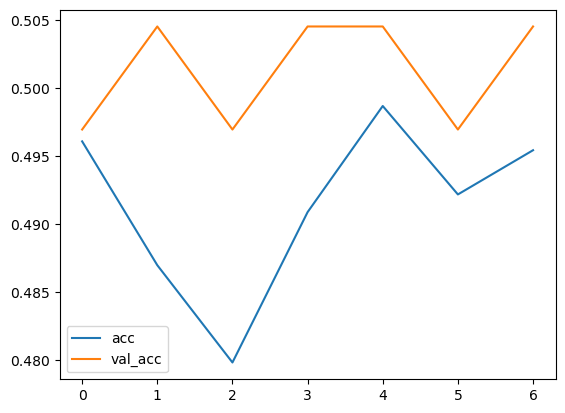

<Figure size 640x480 with 0 Axes>

In [48]:
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.show()
plt.savefig("accuracy plot.jpg")

##### Loss plot

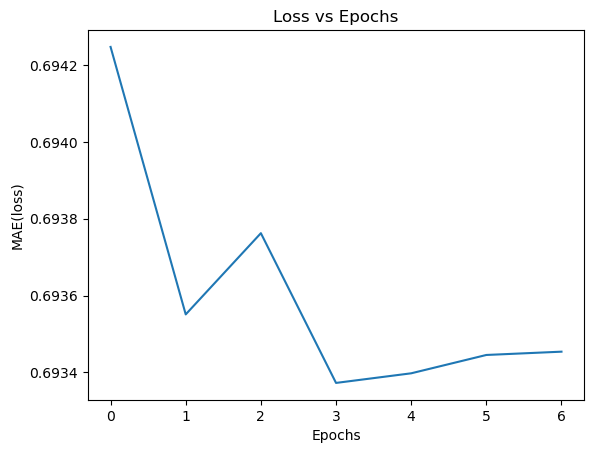

<Figure size 640x480 with 0 Axes>

In [55]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('MAE(loss)')
plt.title('Loss vs Epochs')
plt.show()
plt.savefig("Loss vs Epochs.jpg")

##### Loss plot

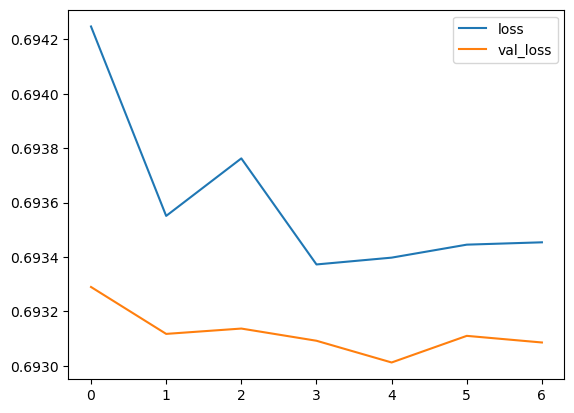

<Figure size 640x480 with 0 Axes>

In [50]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [51]:
#Evaluate model

##### Accuracy and loss plot

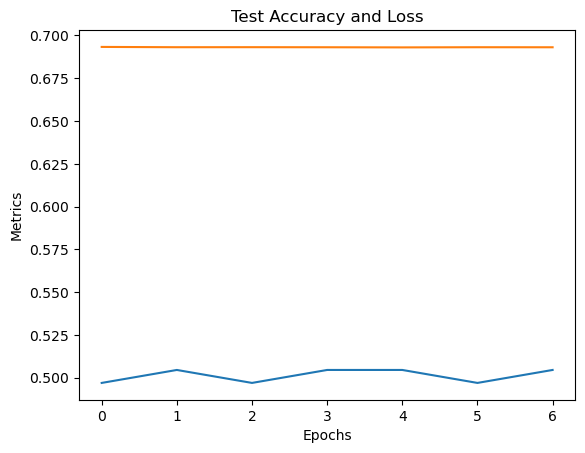

<Figure size 640x480 with 0 Axes>

In [56]:
plt.plot(history.history['val_accuracy'], label = 'val_acc')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Test Accuracy and Loss')
plt.figure()
plt.savefig("Test accuracy and loss.jpg")

##### The predictive accuracy is not optimal and the model needs to be refined to create a more accurate model.

### Part V: Summary and Recommendations

##### Here is the code used to save the model

In [57]:
#Model.save, make recommendations, include sources
model.save("C:\\Users\\ntrei")

INFO:tensorflow:Assets written to: C:\Users\ntrei\assets


INFO:tensorflow:Assets written to: C:\Users\ntrei\assets


##### The neural network needs to be tweaked to find a more accurate model. Things that can be tweaked in the model to do this are the number of epochs, the number of nodes, the embedding layer, and the input length. This would be my recommended course of action to continue fitting the model until it produces more accurate predictions. 

### Part VI: Reporting

##### Appendix I - Code Reference
https://likegeeks.com/python-remove-punctuation/

https://campus.datacamp.com/courses/sentiment-analysis-in-python/sentiment-analysis-nuts-and-bolts?ex=1

https://campus.datacamp.com/courses/feature-engineering-for-nlp-in-python/text-preprocessing-pos-tagging-and-ner?ex=5

https://github.com/drharv/D213_Advanced_Data_Analytics/blob/main/D213%20Task%20II%20-%20Sentiment%20Analysis.pdf

https://github.com/TJRiker11/Advanced-Data-Analytics-D213/blob/main/Neural%20Networks.ipynb

https://westerngovernorsuniversity-my.sharepoint.com/personal/william_sewell_wgu_edu/_layouts/15/onedrive.aspx?
id=%2Fpersonal%2Fwilliam%5Fsewell%5Fwgu%5Fedu%2FDocuments%2FDocuments%2FD213%2FWebinars%2FStemming%5Fand%5FLemmatization%2DPython%2Ehtml&parent=%2Fpersonal%2Fwilliam%5Fsewell%5Fwgu%5Fedu%2FDocuments%2FDocuments%2FD213%2FWebinars&ga=1

https://westerngovernorsuniversity-my.sharepoint.com/personal/william_sewell_wgu_edu/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fwilliam%5Fsewell%5Fwgu%5Fedu%2FDocuments%2FDocuments%2FD213%2FWebinars%2FSentimentAnalysis%5FPresentation%5FNo%5F3%5FFull%5FModel%20%282%29%2Ehtml&parent=%2Fpersonal%2Fwilliam%5Fsewell%5Fwgu%5Fedu%2FDocuments%2FDocuments%2FD213%2FWebinars&ga=1

file:///C:/Users/ntrei/Downloads/Sentiment_Analysis_Presentation_StopWords_ConfusionMatrixScores%20(1).html

file:///C:/Users/ntrei/Downloads/Sentiment_Analysis_Tensorflow_2.html
